Missing values in fake news dataset (title and content): title      0
content    0
dtype: int64
Missing values in real news dataset (title and content): title      0
content    0
dtype: int64
Decision Tree Classifier Accuracy: 0.859122401847575
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       125
           1       0.92      0.88      0.90       308

    accuracy                           0.86       433
   macro avg       0.83      0.84      0.83       433
weighted avg       0.86      0.86      0.86       433

Confusion Matrix:


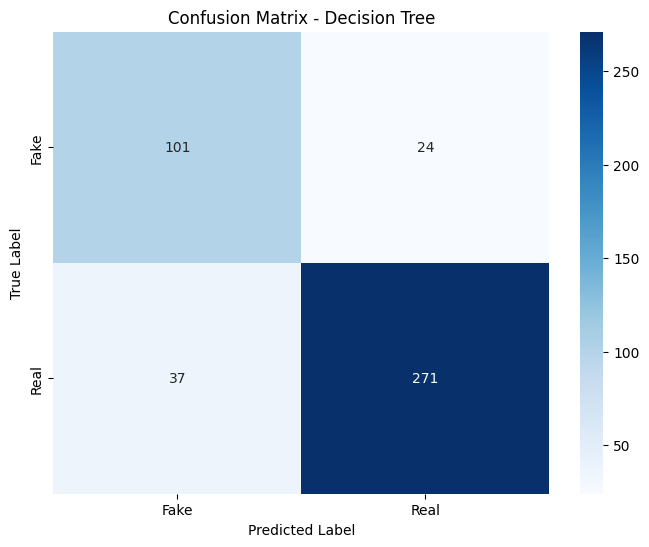

Accuracy of the model: 0.859122401847575


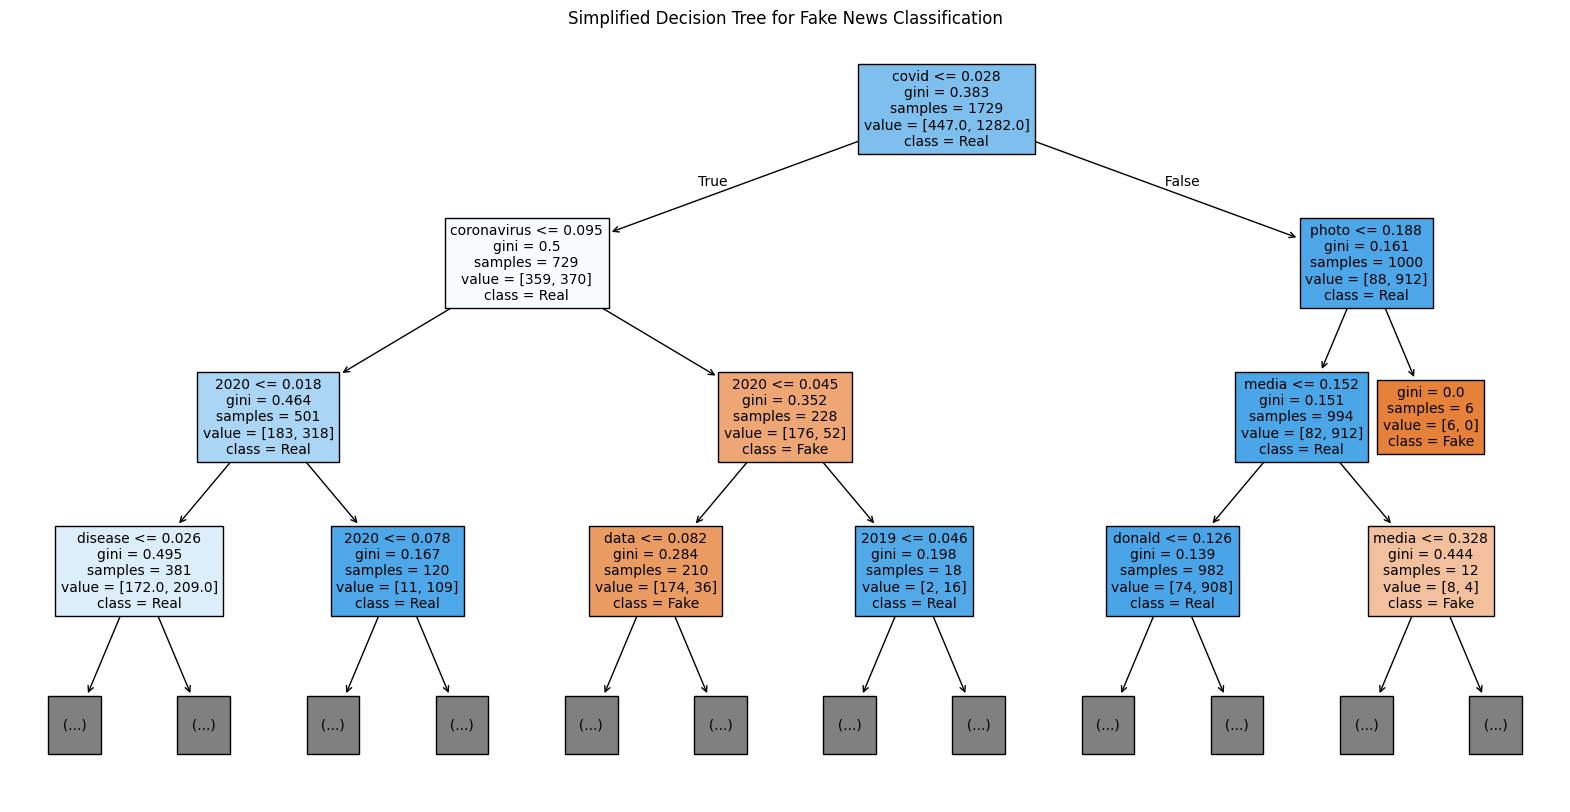

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

fake_news_file_path = '/Users/hariharanduraisingh/Downloads/jupyter_notebook/CoAID/05-01-2020/NewsFakeCOVID-19.csv'
real_news_file_path = '/Users/hariharanduraisingh/Downloads/jupyter_notebook/CoAID/05-01-2020/NewsRealCOVID-19.csv'

fake_news_df = pd.read_csv(fake_news_file_path)
real_news_df = pd.read_csv(real_news_file_path)


fake_news_df['title'] = fake_news_df['title'].fillna('')
fake_news_df['content'] = fake_news_df['content'].fillna('')
real_news_df['title'] = real_news_df['title'].fillna('')
real_news_df['content'] = real_news_df['content'].fillna('')

print("Missing values in fake news dataset (title and content):", fake_news_df[['title', 'content']].isnull().sum())
print("Missing values in real news dataset (title and content):", real_news_df[['title', 'content']].isnull().sum())

X_fake = fake_news_df['title'] + " " + fake_news_df['content']  
X_real = real_news_df['title'] + " " + real_news_df['content']  

y_fake = [0] * len(X_fake)  
y_real = [1] * len(X_real)  

X = pd.concat([X_fake, X_real], ignore_index=True)  
y = y_fake + y_real  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train_tfidf, y_train)

y_pred = dt_classifier.predict(X_test_tfidf)

print("Decision Tree Classifier Accuracy:", dt_classifier.score(X_test_tfidf, y_test))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=vectorizer.get_feature_names_out(), class_names=['Fake', 'Real'], filled=True, fontsize=10, label='all',max_depth=3)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.title("Simplified Decision Tree for Fake News Classification")
plt.show()


